# Modele pożaru lasu i rozprzestrzeniania się epidemii, Greenberg-Hastings

Wykład: https://github.com/houp/ca-class/blob/main/slides/lecture11.pdf

### Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### zad.18
Zaimplementuj jeden z wybranych modeli prezentowanych na wykładzie: DS FFM, SIR lub GH. Jeśli to możliwe (jeśli masz ciekawy pomysł) to wprowadź wybraną modyfikację do wybranego przez Ciebie modelu, np.:
- W modelu SIR wprowadź stan "śmierć", który osiąga się z małym prawdopodobieństwem przy infekcji i zobacz jak inne parametry wpływają na śmiertelność epidemii.
- W modelu FFM wprowadź kierunek wiatru - tzn. prawdopodobieństwo podpalenia może być inne zależnie od tego z której strony sąsiad się pali.
- W modelu GH - poeksperymentuj z liczbą stanów recovery i spróbuj znaleźć wartość krytycznego prawdopodobieństwa przy których, dla zadanej liczby stanów, model istotnie zmienia swoje właściwości.

Rozwiązaniem jest program, który robi wizualizację (w pygame) oraz prezentuje w jakiejś formie wyniki eksperymentów - opis + wykres w notebooku.

In [2]:
# Symulacja modelu SIR z dodatkowym stanu "śmierć"
def simulate_sir_with_death(grid_size, steps, prob_infection, prob_death, prob_recovery):
    grid = np.zeros((grid_size, grid_size), dtype=int)
    # Początkowa infekcja (upewniamy się, że co najmniej jedna osoba jest zainfekowana)
    grid[grid_size // 2, grid_size // 2] = 1  # początkowa infekcja
    
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []
    dead_counts = []
    
    for step in range(steps):
        new_grid = grid.copy()
        for i in range(grid_size):
            for j in range(grid_size):
                if grid[i, j] == 1:  # zainfekowany
                    if np.random.rand() < prob_death:
                        new_grid[i, j] = 3  # śmierć
                    elif np.random.rand() < prob_recovery:
                        new_grid[i, j] = 2  # wyzdrowienie
                    else:
                        for ni in range(i-1, i+2):
                            for nj in range(j-1, j+2):
                                if 0 <= ni < grid_size and 0 <= nj < grid_size and grid[ni, nj] == 0:
                                    if np.random.rand() < prob_infection:
                                        new_grid[ni, nj] = 1  # infekcja
        
        grid = new_grid
        susceptible_counts.append(np.sum(grid == 0))
        infected_counts.append(np.sum(grid == 1))
        recovered_counts.append(np.sum(grid == 2))
        dead_counts.append(np.sum(grid == 3))
    
    return susceptible_counts, infected_counts, recovered_counts, dead_counts


#### Przeprowadzenie symulacji z parametrami tak jak w lab11.py

In [3]:
# Parametry symulacji
grid_size = 50
steps = 200
prob_infection = 0.2
prob_death = 0.01 # 1%
prob_recovery = 0.05

In [4]:
# Wykonanie symulacji
susceptible_counts, infected_counts, recovered_counts, dead_counts = simulate_sir_with_death(
    grid_size, steps, prob_infection, prob_death, prob_recovery)

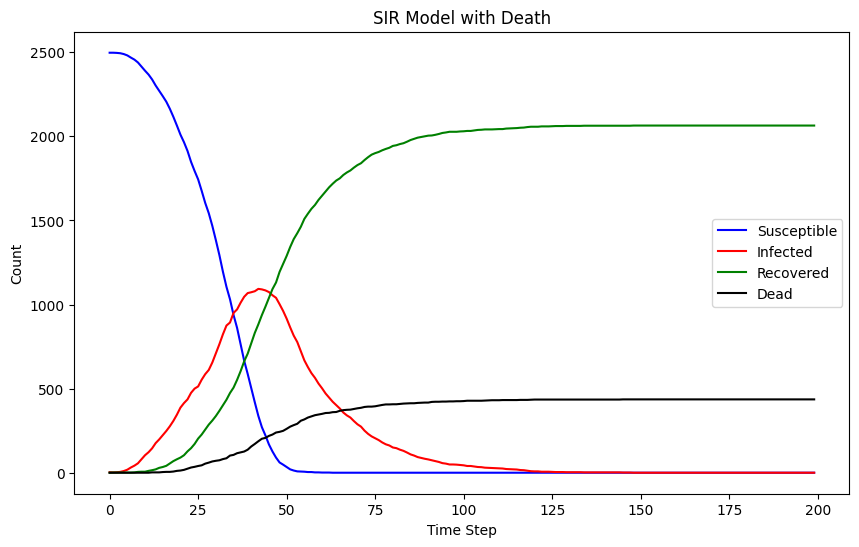

In [5]:
# Wykresy wyników
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label='Susceptible', color='blue')
plt.plot(infected_counts, label='Infected', color='red')
plt.plot(recovered_counts, label='Recovered', color='green')
plt.plot(dead_counts, label='Dead', color='black')
plt.xlabel('Time Step')
plt.ylabel('Count')
plt.title('SIR Model with Death')
plt.legend()
plt.show()

#### Eksperyment badający wpływ parametrów na śmiertelność

In [6]:
# Zakres wartości dla eksperymentów
infection_probs = [0.1, 0.2, 0.3]
death_probs = [0.01, 0.02, 0.03]
recovery_probs = [0.05, 0.1, 0.15]

In [15]:
# Wykonanie symulacji - przeprowadzenie eksperymentów
results = {}

for prob_infection in infection_probs:
    for prob_death in death_probs:
        for prob_recovery in recovery_probs:
            key = (prob_infection, prob_death, prob_recovery)
            susceptible_counts, infected_counts, recovered_counts, dead_counts = simulate_sir_with_death(
                grid_size, steps, prob_infection, prob_death, prob_recovery)
            results[key] = (susceptible_counts, infected_counts, recovered_counts, dead_counts)

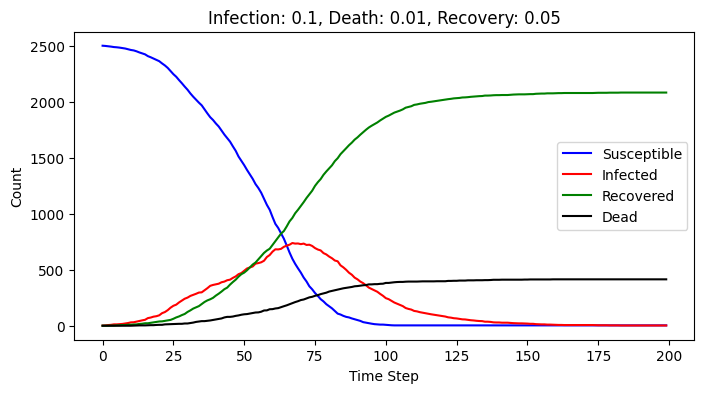

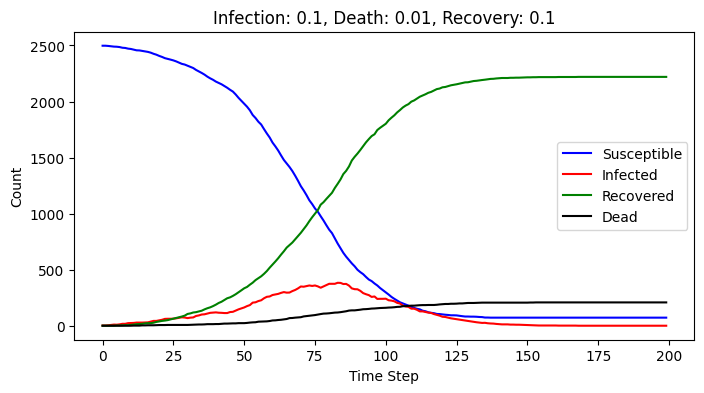

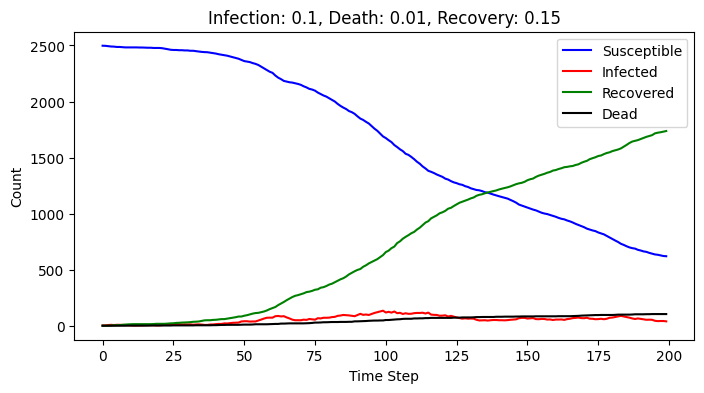

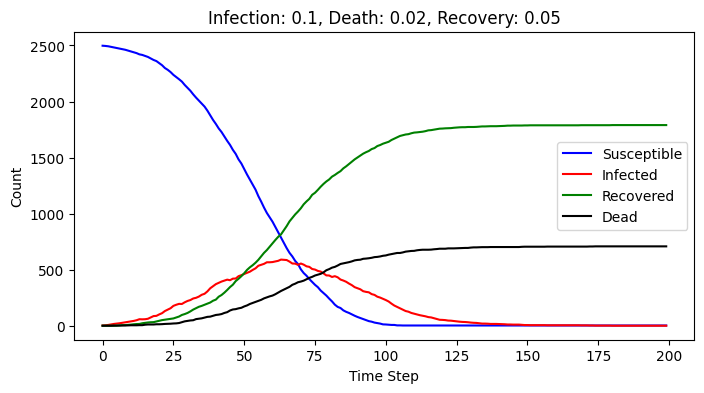

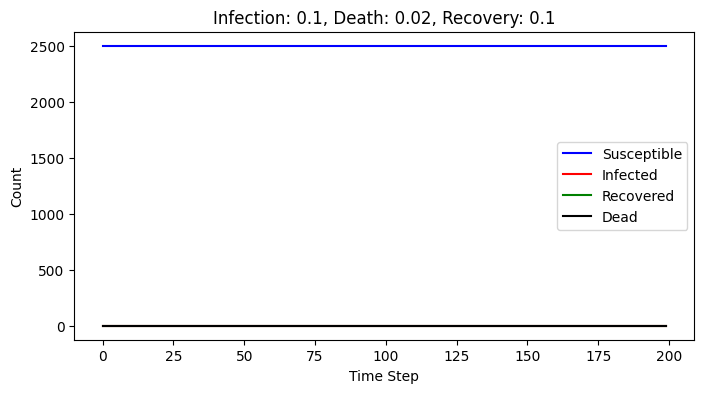

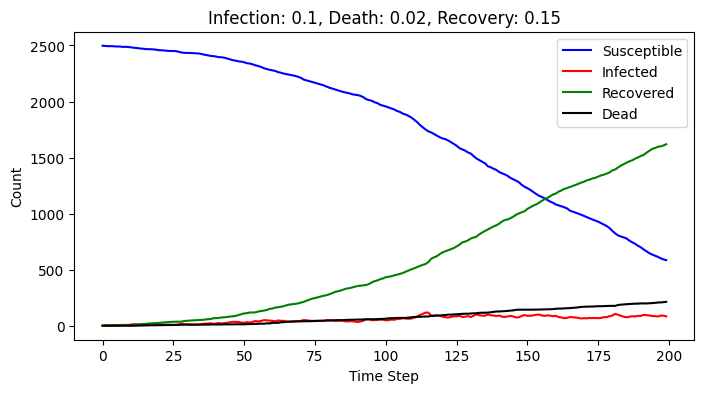

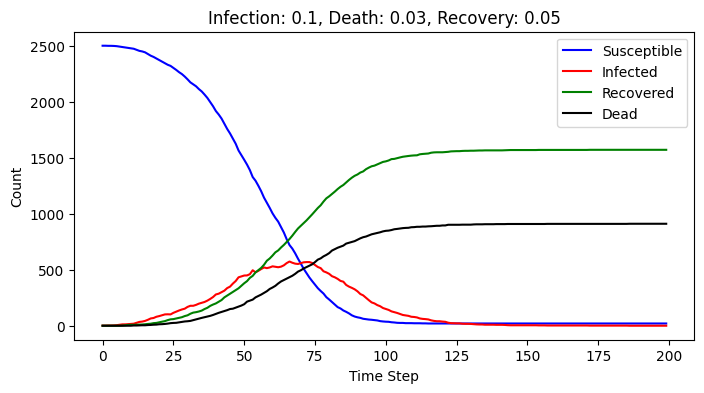

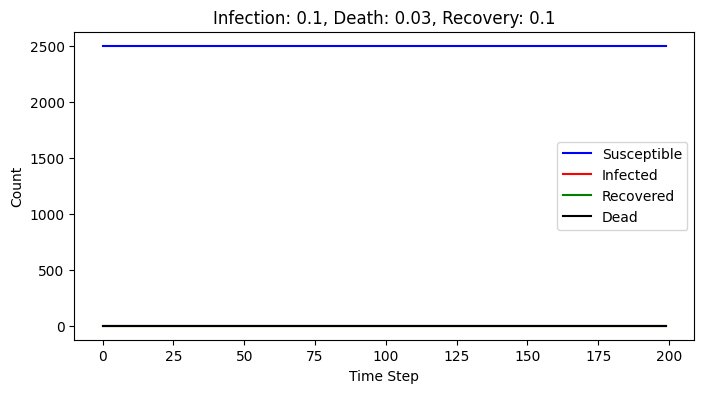

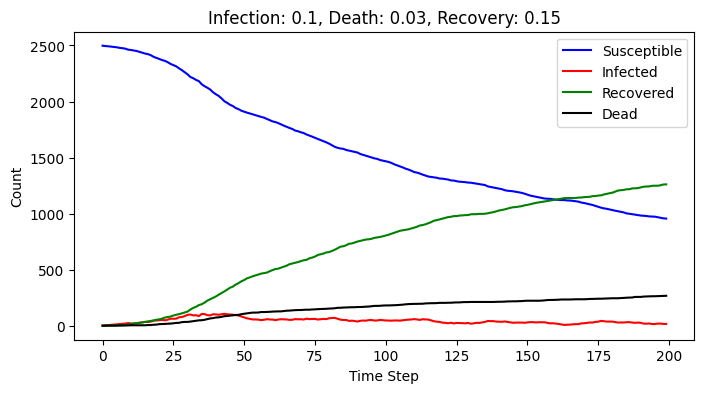

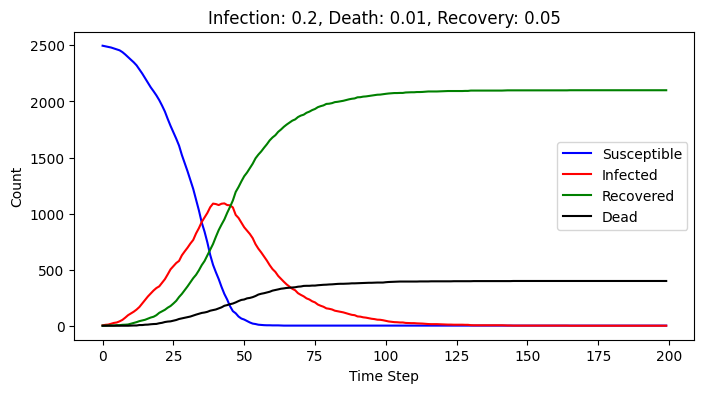

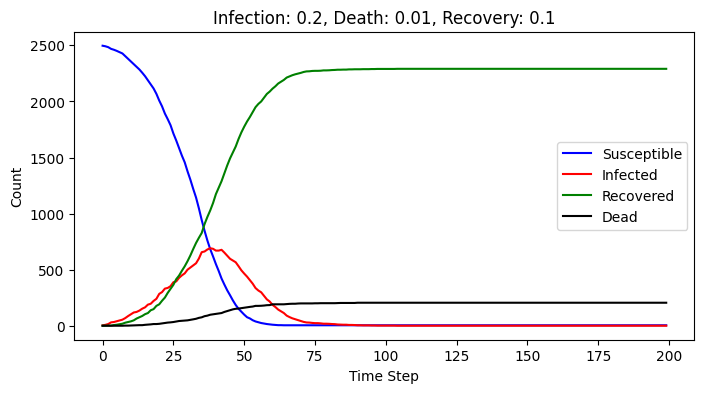

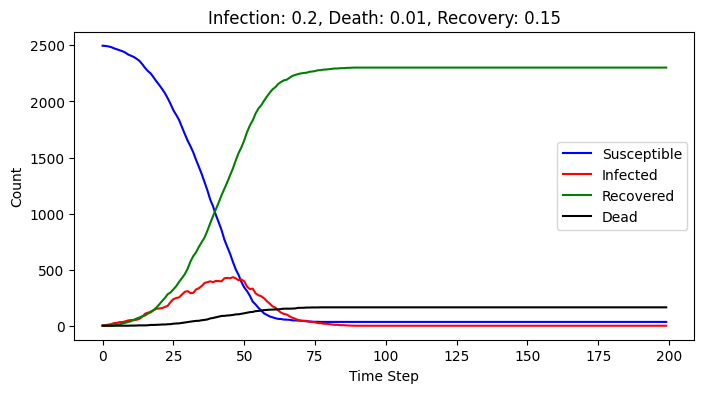

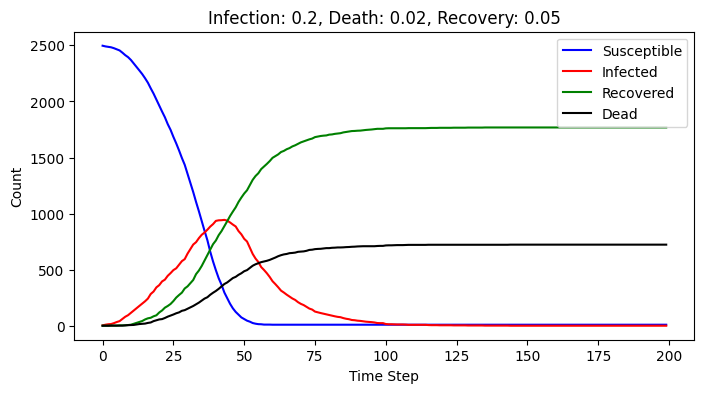

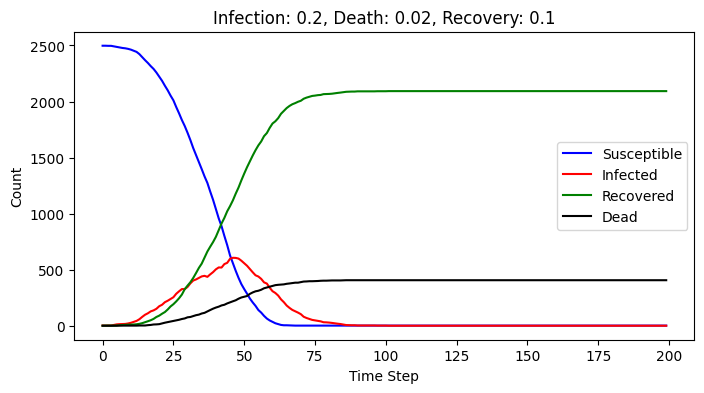

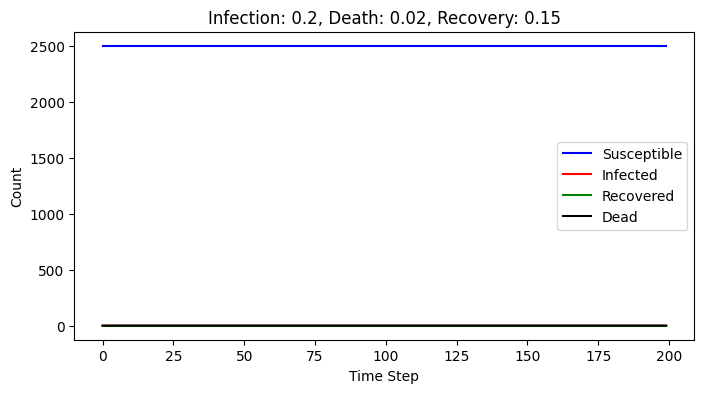

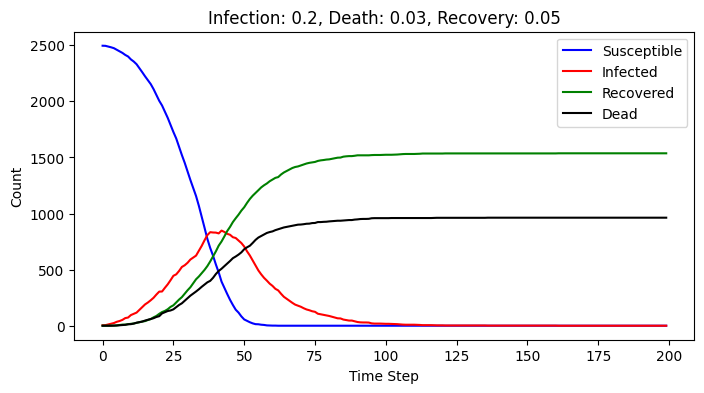

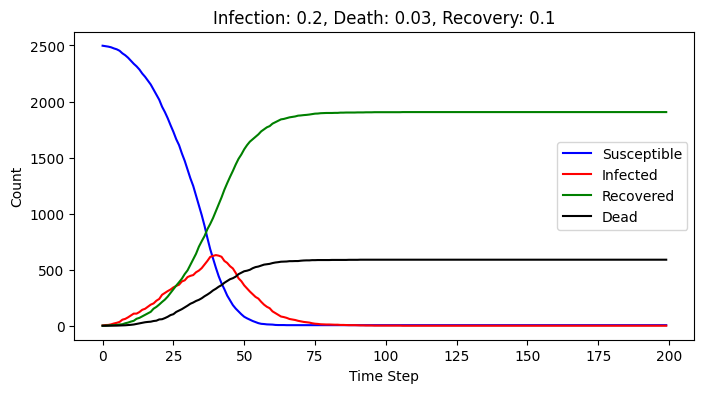

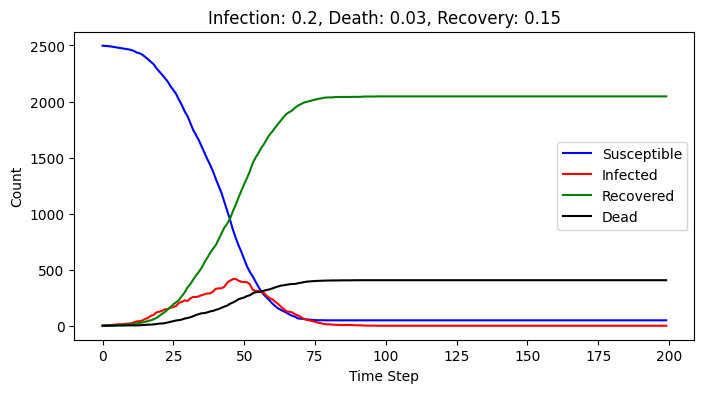

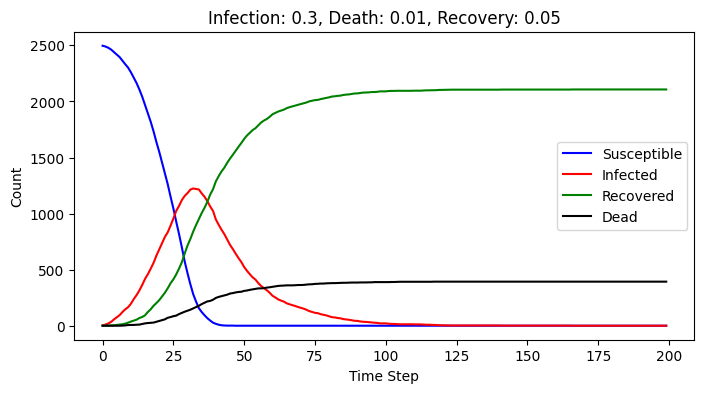

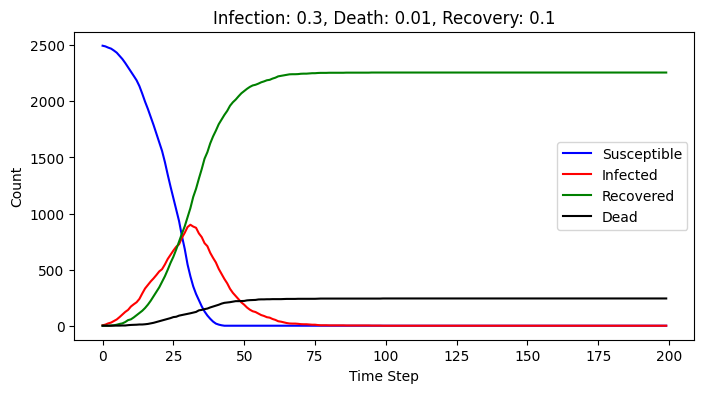

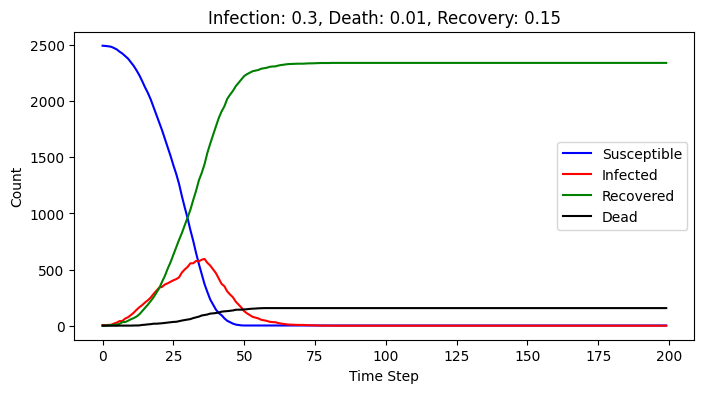

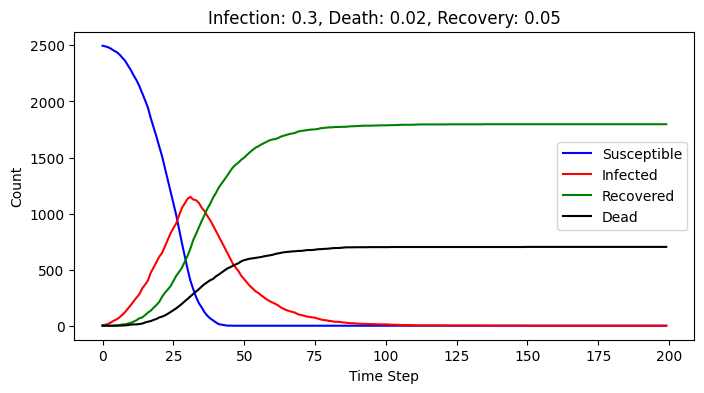

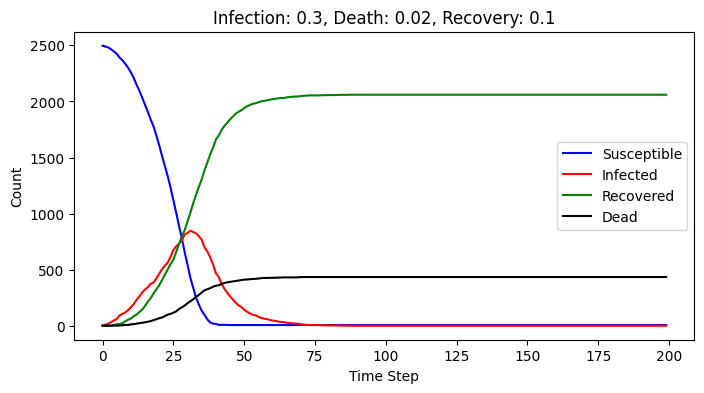

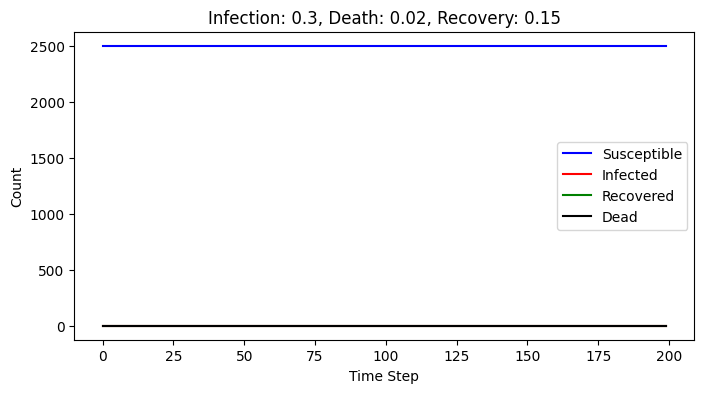

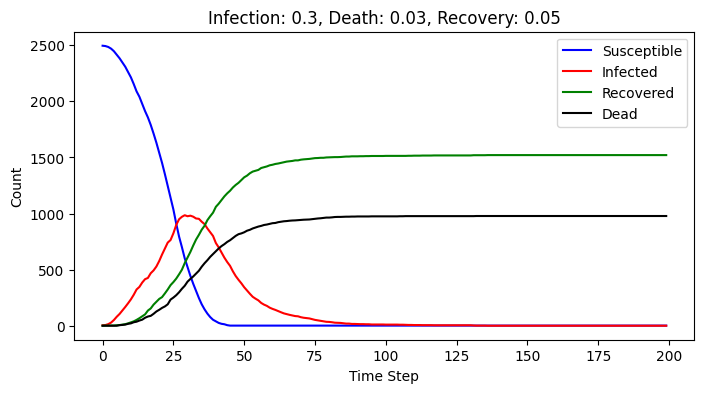

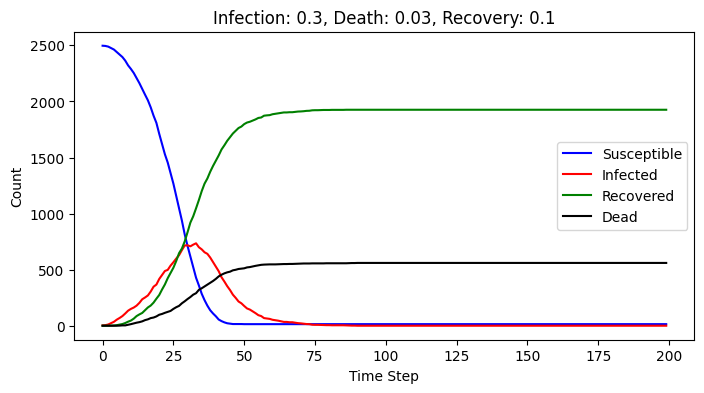

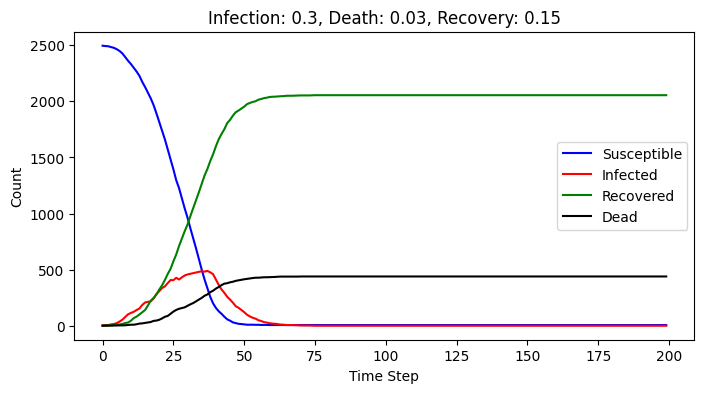

In [16]:
# Wizualizacja wyników
for (prob_infection, prob_death, prob_recovery), (susceptible_counts, infected_counts, recovered_counts, dead_counts) in results.items():
    plt.figure(figsize=(8, 4))
    plt.plot(susceptible_counts, label='Susceptible', color='blue')
    plt.plot(infected_counts, label='Infected', color='red')
    plt.plot(recovered_counts, label='Recovered', color='green')
    plt.plot(dead_counts, label='Dead', color='black')
    plt.xlabel('Time Step')
    plt.ylabel('Count')
    plt.title(f'Infection: {prob_infection}, Death: {prob_death}, Recovery: {prob_recovery}')
    plt.legend()
    plt.show()

Zaobserwowane zależności:
- Wzrost prawdopodobieństwa infekcji (prob_infection) prowadzi do szybszego rozprzestrzeniania się choroby i większej liczby zainfekowanych osób w krótszym czasie.
- Wzrost prawdopodobieństwa śmierci (prob_death) prowadzi do większej liczby zgonów, co można zaobserwować jako wzrost liczby osób martwych.
- Wzrost prawdopodobieństwa wyzdrowienia (prob_recovery) prowadzi do szybszego wzrostu liczby wyzdrowiałych osób i zmniejszenia liczby zainfekowanych osób w późniejszych etapach symulacji.

Niektóre wykresy dla dużego prawdopodobieństwa wyzdrowienia czasem przedstawiają dwie poziome linie: niebieską (Susceptible) na poziomie około 2500 i czarną (Dead) na poziomie około 0. Prawdopodobnie wynika to z konfiguracji początkowej (infekcja zaczyna się od jednej osoby), zainfekowana osoba wyzdrowiała zanim zdążyła kogoś zarazić. Wystarczy dla danego zestawu parametrów uruchomić symulację jeszcze raz (lub kilka razy) aby otrzymać inny wynik.